### Intern Name - Tushar Amritkar
### Task 1 - Prediction Using ML
#### Data Source- "http://bit.ly/w-data"
### Problem Statement- To predict the percentage of a student based on the number of study hours.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Reading  data from Link

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.isnull()


,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Visualizing the dataset

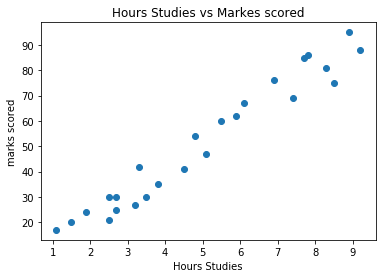

In [6]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours Studies')
plt.ylabel('marks scored')
plt.title('Hours Studies vs Markes scored')
plt.show()

### From the graph above, we can clearly see that there is apositive linear relation between the number of hours studies and marks scored

In [7]:
# To determine the corelation between variable
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
## Using iloc function we will divide the data
X=df.iloc[:,:-1].values
y=df.iloc[:,1:].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

## Splitting data into trainning and testing data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Trainning the Algorithm

In [11]:
l=LinearRegression()
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
## To print coeffient and intercept model
l.coef_

array([[9.91065648]])

In [13]:
l.intercept_

array([2.01816004])

### Visualizing the model

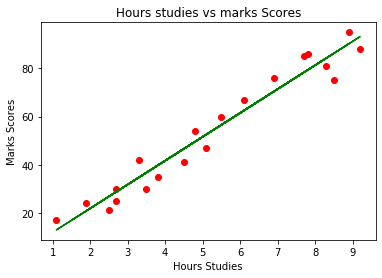

In [14]:
## Plotting the regression line
line=l.coef_*X+l.intercept_

#plotting the test data
plt.scatter(X_train,y_train,color='red')
plt.plot(X,line,color='green')
plt.xlabel('Hours Studies')
plt.ylabel('Marks Scores')
plt.title('Hours studies vs marks Scores')
plt.show()

## Making Predictions

In [15]:
print(X_test)
y_pred=l.predict(X_test) ## Predicting the Score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing actual and predicting values of dataframes
comp=pd.DataFrame({"Actual":[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [17]:
# We can check with our own value which is given in that task.
hours=9.25
own_pred=l.predict([[hours]])
print("Number of Hours={}",format(hours))
print('Predicting Score={}',format(own_pred[0]))

Number of Hours={} 9.25
Predicting Score={} [93.69173249]


In [18]:
# Evaluating the model
print('mean Absolute error', metrics.mean_absolute_error(y_test,y_pred))

mean Absolute error 4.183859899002975
